# Quantum Information and Computing

Nguyen Xuan Tung

ID: 2005491
    
Week 7, Exercise: Ising model:
        
Consider 𝑁 spin-1/2 particles on a one-dimensional lattice, described by the Hamiltonian
        

$$ \hat H = \lambda \sum_{i}^{N} \sigma^{z}_i +  \sum_{i}^{N-1} \sigma^{x}_i \sigma^{x}_{i+1} $$
            
where $\sigma_x$ and $\sigma_z$ are the Pauli matrices and $\lambda$ is the interaction strength

(a) Write a program to compute the 2𝑁 x 2𝑁 matrix representation of the Hamiltonian $\hat H$ for different
𝑁.

(b) Diagonalize H for different $𝑁 = 1, ..., 𝑁_{𝑚𝑎𝑥}$ and 𝜆 ∈ [0 − 3]. What is the largest is 𝑁𝑚𝑎𝑥 you can
reach?

(c) Plot the first 𝑘 levels as a function of 𝜆 for different 𝑁 and comment on the spectrum.

In [25]:
import matplotlib.pyplot as plt             
import numpy as np                            

from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [26]:
! gfortran ./ising_mod.f90 -o ising_mod -llapack

In [62]:
def plt_ev_lambdas(N,nlam,k):
    folder = 'N'+str(N)+'l'+str(nlam)
    ! echo $N $nlam $folder | ./ising_mod. >/dev/null
    
    eivals = np.genfromtxt('./data/lambdas/'+folder+'/eigenvalue', delimiter='')
    
    plt.title('Energy values for N='+str(N))
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    
    x = np.linspace(0,3,nlam)
    
    for i in range(k):
        plt.plot(x,eivals[:-1,i],label='k='+str(i))
            
    plt.legend()
    plt.yticks(rotation=90)
    plt.grid(True)

def plt_ev_Ns(Ns,nlam,k):
    plt.title(str(k) + ' energy state')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    for N in Ns:
        folder = 'N'+str(N)+'l'+str(nlam)
        ! echo $N $nlam $folder | ./ising_mod. >/dev/null
    
        eivals = np.genfromtxt('./data/lambdas/'+folder+'/eigenvalue', delimiter='')
    
        plt.plot(x,eivals[:-1,k],label='N='+str(N))

    plt.legend()
    
def plt_ev_MFA(nlam):
    plt.title('Ground state Mean Field Approximation')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    xx = 0
    y = []
    y1 = []
    y2 = []
    while(x[xx]<=2):
        y.append( -1 - (x[xx]**2)/4 )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    while(xx < nlam):
        y.append( -x[xx] )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    plt.plot(x,y,label='MFA',color='white')
    plt.plot(x,y1,label='linear',ls='--',color='red',alpha=0.8)
    plt.plot(x,y2,label='quadratic',ls='--',color='blue',alpha=0.8)
    plt.plot(2, -2, marker='+',color='crimson', ms=10,mew=2)
    plt.ylim(-3,-0.8)
    plt.legend()


/usr/bin/sh: 1: ./ising_mod.: not found


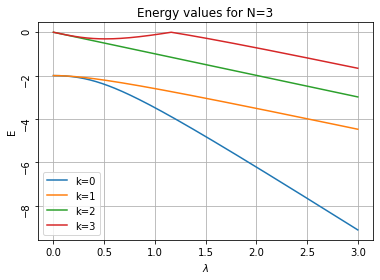

In [63]:
plt_ev_lambdas(3,200,4)

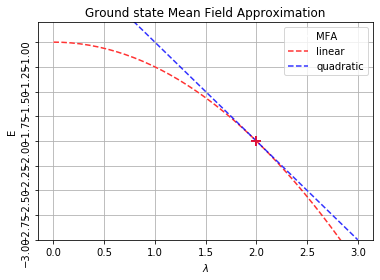

In [64]:
plt_ev_MFA(35)

In [65]:
x = np.linspace(0,3,50)
xx = 0
mfa = []
while(x[xx]<=2):
    mfa.append( -1 - (x[xx]**2)/4 )
    xx = xx + 1
while(xx < 50):
    mfa.append( -x[xx] )
    xx = xx + 1

/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: echo: echo: I/O error
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: echo: echo: I/O error
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: echo: echo: I/O error
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin/sh: 1: echo: echo: I/O error
/usr/bin/sh: 1: ./ising_mod.: not found
/usr/bin

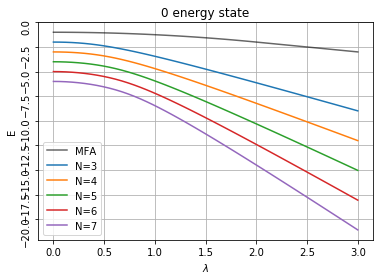

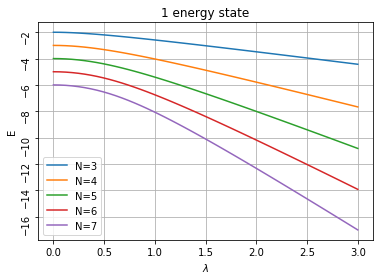

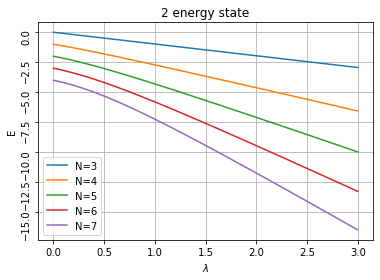

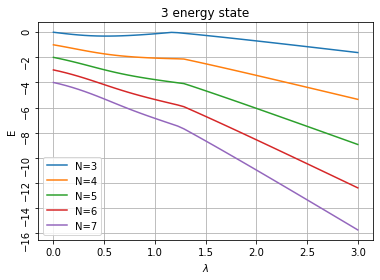

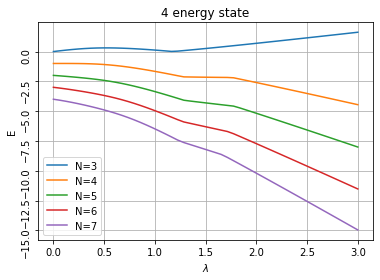

<Figure size 432x288 with 0 Axes>

In [66]:
plt.plot(x,mfa,color='black',label='MFA',alpha=0.6)
for en in range(5):
    Ns = np.arange(3,8)
    plt_ev_Ns(Ns,50,en)
    plt.figure()